In [8]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [9]:
# Download the data of Davidson
url = "https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv"
df = pd.read_csv(url,index_col=0,parse_dates=[0],encoding='ISO-8859-1')

The data are stored as a CSV and as a pickled pandas dataframe (Python 2.7). Each data file contains 5 columns:

count = number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF).

hate_speech = number of CF users who judged the tweet to be hate speech.

offensive_language = number of CF users who judged the tweet to be offensive.

neither = number of CF users who judged the tweet to be neither offensive nor non-offensive.

class = class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

In [10]:
np.random.seed(42)
df.head(5)

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker ...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


In [12]:
df["hate_speech"].value_counts()

0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: hate_speech, dtype: int64

In [13]:
df["class"].value_counts() 
#1430 tweets considered as hateful content

1    19190
2     4163
0     1430
Name: class, dtype: int64

NameError: name 'save_fig' is not defined

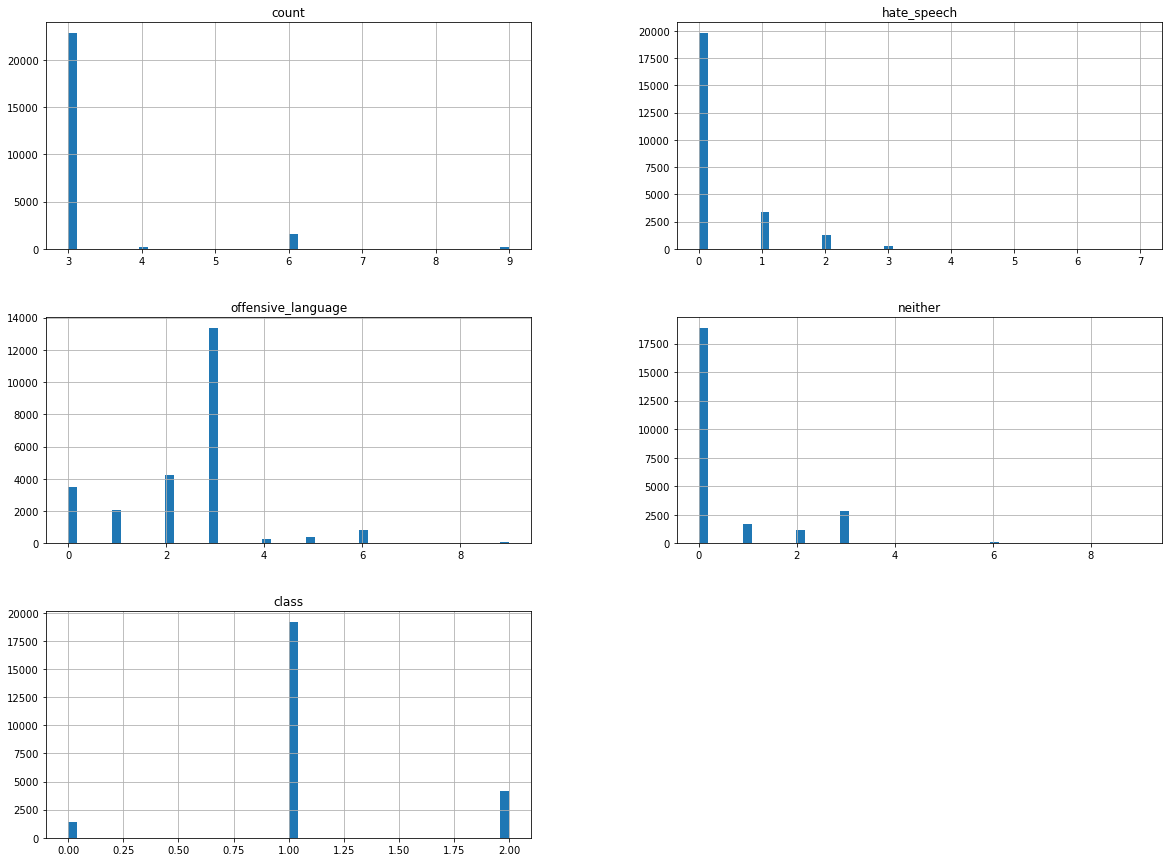

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [15]:
#No missing values
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows

,count,hate_speech,offensive_language,neither,class,tweet


In [16]:
df = df.drop(columns=['count','hate_speech','offensive_language','neither'])

# Clean the tweets

## Visualization of the most frequent words

In [ ]:
conda install -c conda-forge wordcloud=1.6.0 

(-0.5, 399.5, 199.5, -0.5)

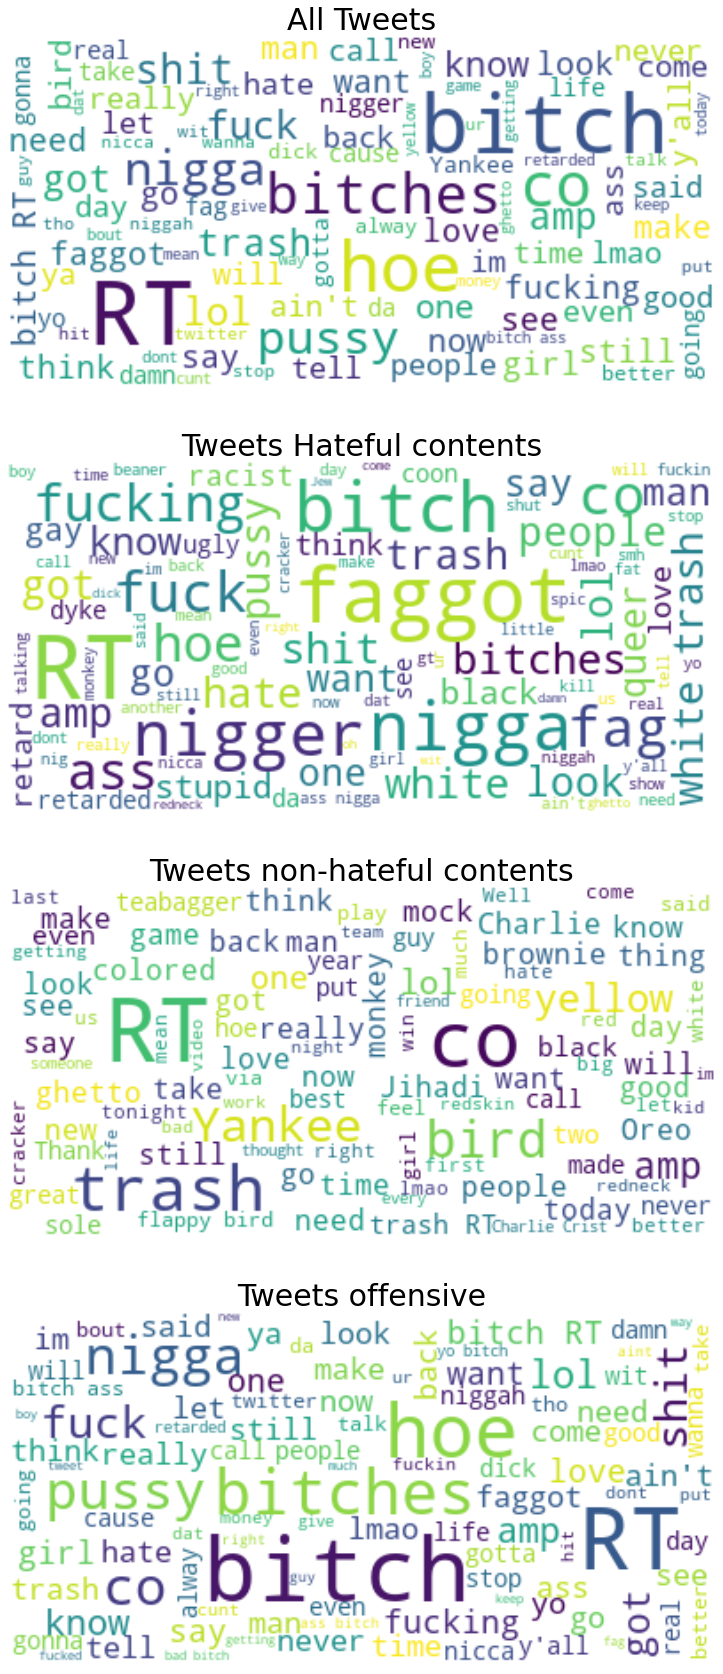

In [17]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Start with one review:
df_hateful = df[df['class']==0]
df_nonhateful = df[df['class']==2]
df_offensive = df[df['class']==1]
tweet_All = " ".join(review for review in df.tweet)
tweet_hateful = " ".join(review for review in df_hateful.tweet)
tweet_nonhateful = " ".join(review for review in df_nonhateful.tweet)
tweet_offensive = " ".join(review for review in df_offensive.tweet)

fig, ax = plt.subplots(4, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_hateful = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_hateful)
wordcloud_nonhateful = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_nonhateful)
wordcloud_offensive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_offensive)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_hateful, interpolation='bilinear')
ax[1].set_title('Tweets Hateful contents',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_nonhateful, interpolation='bilinear')
ax[2].set_title('Tweets non-hateful contents',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_offensive, interpolation='bilinear')
ax[3].set_title('Tweets offensive',fontsize=30)
ax[3].axis('off')

In [18]:
# get a word count per sentence column
def word_count(sentence):
    return len(sentence.split())
    
df['word count'] = df['tweet'].apply(word_count)
df.head(3)

,class,tweet,word count
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a...,25
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!,16
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry?...,21


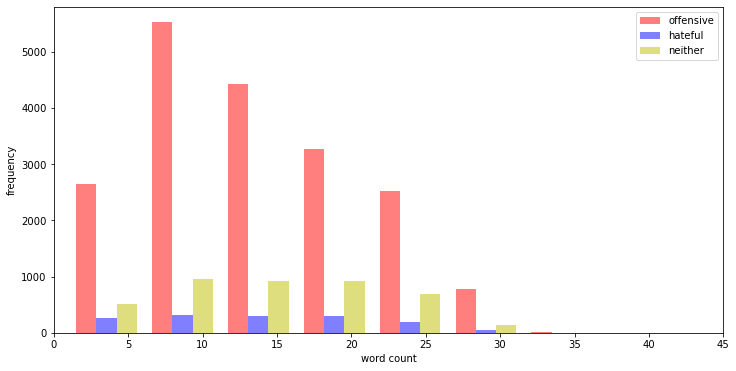

In [19]:
# plot word count distribution for both positive and negative sentiments
x = df['word count'][df['class'] == 1]
y = df['word count'][df['class']  == 0]
z = df['word count'][df['class']  == 2]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y,z], color=['r','b','y'], alpha=0.5, label=['offensive','hateful','neither'])
plt.legend(loc='upper right')

## Remove punctuation & other characters

In [ ]:
string.punctuation ##what we want to delete from tweets

In [20]:
def remove_punct(text):
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text = re.sub(mention_regex, '',text)
    text = re.sub(giant_url_regex, '',text)
    # To lowercase
    text = text.lower()
    # Remove hashtags
    text = re.sub(r'#\w*', '', text)
    return text

# clean dataframe's text column
df['tweet'] = df['tweet'].apply(remove_punct)
# preview some cleaned tweets
df['tweet'].head()

0     rt mayasolovely as a woman you shouldnt complain about cleaning up your house amp as a man you ...
1                                  rt mleew boy dats coldtyga dwn bad for cuffin dat hoe in the st place
2     rt urkindofbrand dawg rt sbabylife you ever fuck a bitch and she start to cry you be confused a...
3                                                         rt cganderson vivabased she look like a tranny
4     rt shenikaroberts the shit you hear about me might be true or it might be faker than the bitch ...
Name: tweet, dtype: object

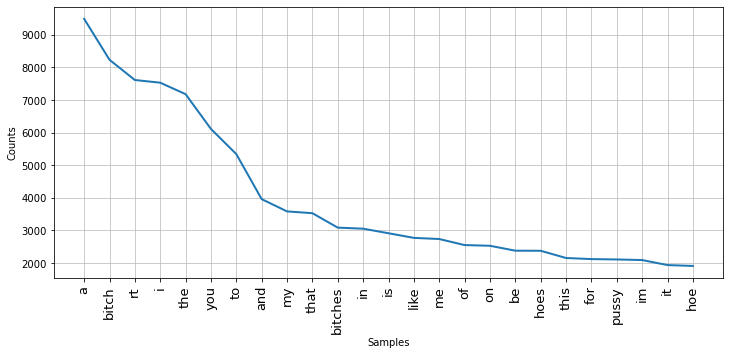

NameError: name 'Counter' is not defined

In [21]:
# most common words in twitter dataset
all_words = []
for line in list(df['tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)
# log-log of all words 

word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

## Stopwords and tokenization

Split the words in the Tweets so we used the tokenizer available in the nltk library

### Remove stopwords
we do have some words in the dataset that are common in natural human language but used in most sentence compositions that we would be better left off since they bring no useful features to our model.

After removing stop-words we split all the sentences in the dataset to get individual words (tokens) which is basically a list of words per sentence contained in the newly processed tweet. Now we can see that we have two new columns in the dataframe that contains these tokenized versions of a tweet.

In [22]:
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]

In [24]:
from nltk.corpus import stopwords
# tokenize message column and create a column for tokens
df = df.copy()
df['tokens'] = df['tweet'].apply(text_process) # tokenize style 1

# Vectorization (Bag-of-words)

In [25]:
# vectorize
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['tweet'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))
# output
6865
# example of vectorized text
sample_tweet = df['tweet'][111]
print(sample_tweet)
print('\n')
# vector representation
bow_sample = bow_transformer.transform([sample_tweet])
print(bow_sample)
print('\n')

36320
devilgrimz vigxrarts youre fucking gay blacklisted hoe holding out for tehgodclan anyway httptcoxuccwoetmn


  (0, 1114)	1
  (0, 2992)	1
  (0, 7418)	1
  (0, 10500)	1
  (0, 10819)	1
  (0, 12640)	1
  (0, 12725)	1
  (0, 15732)	1
  (0, 31493)	1
  (0, 34132)	1
  (0, 36045)	1




In [26]:
# transform the entire DataFrame of messages
messages_bow = bow_transformer.transform(df['tweet'])
# check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (24783, 36320)
Amount of Non-Zero occurences:  212357


# IDTif 
* weight of words depending on the frequency of their apparence

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 36045)	0.17656260483583813
  (0, 34132)	0.3658303487126007
  (0, 31493)	0.3806348590924486
  (0, 15732)	0.3806348590924486
  (0, 12725)	0.315213393398041
  (0, 12640)	0.13228328739293466
  (0, 10819)	0.22683990732707793
  (0, 10500)	0.1718323659169749
  (0, 7418)	0.3553263814351687
  (0, 2992)	0.3806348590924486
  (0, 1114)	0.2761289921175118


In [28]:
# to transform the entire bag-of-words corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(24783, 36320)


# Model

## Naive-Bayes Model with TDiDF transformer

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['class'], test_size=0.2)

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
# this is where we define the values for GridSearchCV to iterate over
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
             }
# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)
# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   45.1s finished



Best Model: 0.859276 using {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.833704 Stdev:(0.005153) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.853627 Stdev:(0.005732) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.826340 Stdev:(0.005655) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.845305 Stdev:(0.006164) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.848382 Stdev:(0.005168) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.859276 Stdev:(0.003572) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.842833 Stdev:(0.005582) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.853375 Stdev:(0.005225) with: {'bow__ngram_range'

We passed a combined 8 parameters to the GridsearchCV object and 10 folds for the cross validation which means that for every parameter combination, the grid will run 10 different iterations with a different test set every time.

# Evaluation

In [34]:
pip install --user joblib

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\externals\__init__.py)

In [45]:
import joblib as joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# save best model to current working directory
joblib.dump(grid, "twitter_hateful.pkl")
# load from file and predict using the best configs found in the CV step
model_NB = joblib.load("twitter_hateful.pkl" )
# get predictions from best model above
y_preds = model_NB.predict(X_test)

print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('recall score: \n',recall_score(y_test,y_preds, average='micro'))
print('\n')
print('precision score: \n',precision_score(y_test,y_preds, average='micro'))
print('\n')
print('F1 measure: \n',f1_score(y_test,y_preds, average='micro'))
print('\n')
print(classification_report(y_test, y_preds))

accuracy score:  0.8577768811781319


recall score: 
 0.8577768811781319


precision score: 
 0.8577768811781319


F1 measure: 
 0.8577768811781319




NameError: name 'classification_report' is not defined

https://towardsdatascience.com/multiclass-classification-with-word-bags-and-word-sequences-4fffd4d62e0c